<a href="https://colab.research.google.com/github/PaSathees/random-notebooks/blob/main/PyTorch_Transfer_learning_testing_with_modularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[PyTorch course notebook](https://github.com/PaSathees/ai-courses/blob/main/3.%20PYTORCH%20-%20UDEMY/6.%20PyTorch%20Transfer%20Learning/06_pytorch_transfer_learning.ipynb)

[Modular code repo](https://github.com/PaSathees/pytorch-bp)

# 1. Imports and environment setup

In [1]:
# Getting modue
!rm -rf pytorch_mod
!git clone https://github.com/PaSathees/pytorch_mod.git

Cloning into 'pytorch_mod'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 146 (delta 88), reused 91 (delta 40), pack-reused 0
Receiving objects: 100% (146/146), 34.55 KiB | 11.52 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [2]:
pip install -r pytorch_mod/requirements.txt --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.6 MB/s eta 0

In [3]:
from pytorch_mod import env_setup, data_setup, engine, evaluation, utils, visualization, experimentation, deployment, cv_model_builders

In [4]:
env_setup.print_gpu_status()

1 Supported CUDA GPU available


In [5]:
device = env_setup.get_agnostic_device()
device

'cuda'

In [6]:
env_setup.print_versions()

PyTorch Version: 2.0.1+cu118
Matplotlib Version: 3.7.1
Pandas Version: 1.5.3
Numpy Version: 1.23.5
Torchvision Version: 0.15.2+cu118
Torchaudio Version: 2.0.2+cu118
Scikit-learn Version: 1.2.2
Torchmetrics Version: 1.1.1
TQDM Version: 4.66.1
MLEXTEND Version: 0.22.0
PIL Version: 9.4.0
Torchinfo Version: 1.8.0
Gradio Version: 3.43.1


In [7]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torchinfo import summary

# 2. Getting data
Data is from the course given in a zip file.

No need to bother with the problem as this is only testing modularized code.

In [8]:
image_path = utils.download_data(
    source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
    destination="pizza_steak_sushi",
    remove_source = True
)

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


In [9]:
train_dir = image_path / "train"
test_dir = image_path / "test"

# 3. Creating dataloaders

In [10]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [11]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [12]:
train_dataloader, test_dataloader, class_names = data_setup.create_cv_dataloaders(train_dir=train_dir,
                                                                       test_dir=test_dir,
                                                                       train_transform=auto_transforms,
                                                                      test_transform=auto_transforms,
                                                                       batch_size=32)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7a5926cb74f0>,
 ['pizza', 'steak', 'sushi'])

In [13]:
#Testing with val_dataloader
train_dataloader, val_dataloader, test_dataloader, class_names = data_setup.create_cv_dataloaders(train_dir=train_dir,
                                                                                                  test_dir=test_dir,
                                                                                                  val_dir=test_dir,
                                                                                                  train_transform=auto_transforms,
                                                                                                  test_transform=auto_transforms,
                                                                                                  val_transform=auto_transforms,
                                                                                                  batch_size=32)

train_dataloader, val_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7a5926cec1c0>,
 ['pizza', 'steak', 'sushi'])

# 4. Getting Pre-trained model

In [14]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 25.4MB/s]


In [15]:
summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [16]:
# Freeze features
for param in model.features.parameters():
  param.requires_grad = False

In [17]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(class_names)

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape,
                    bias=True)
).to(device)

In [18]:
summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

# 5. Training Model

In [19]:
# Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
utils.set_seeds()

results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       val_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

[INFO] Using device: cuda


  0%|          | 0/5 [00:00<?, ?it/s]

[INFO] Epoch: 1 | Train_loss: 1.0924 | Train_acc: 0.3984 | Val_loss: 0.9133 | Val_acc: 0.5398
[INFO] Epoch: 2 | Train_loss: 0.8717 | Train_acc: 0.7773 | Val_loss: 0.7912 | Val_acc: 0.8153
[INFO] Epoch: 3 | Train_loss: 0.7648 | Train_acc: 0.7930 | Val_loss: 0.7463 | Val_acc: 0.8561
[INFO] Epoch: 4 | Train_loss: 0.7109 | Train_acc: 0.7539 | Val_loss: 0.6373 | Val_acc: 0.8655
[INFO] Epoch: 5 | Train_loss: 0.6255 | Train_acc: 0.7852 | Val_loss: 0.6261 | Val_acc: 0.8561
[INFO] Training time: 13.369 seconds


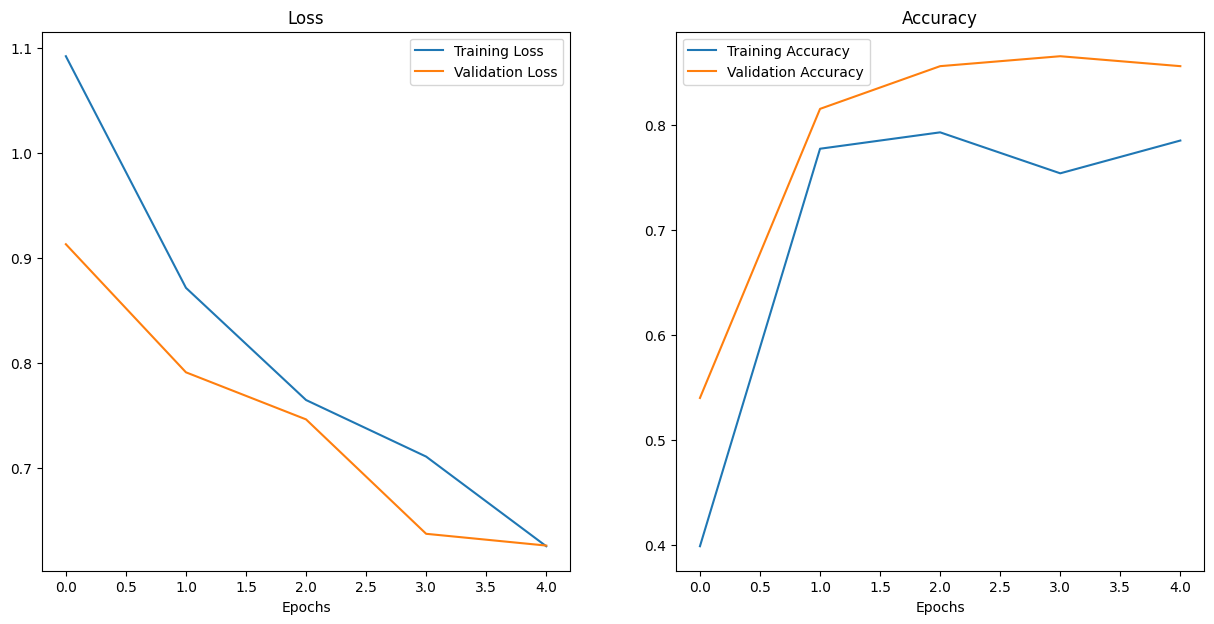

In [21]:
visualization.plot_curves(results)

# 6. Making Predictions

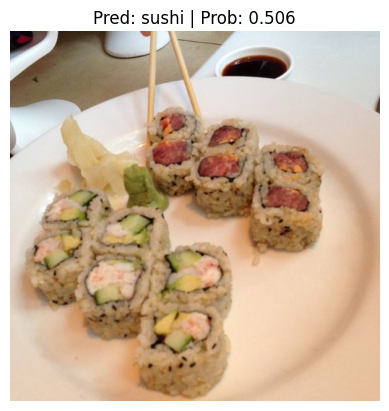

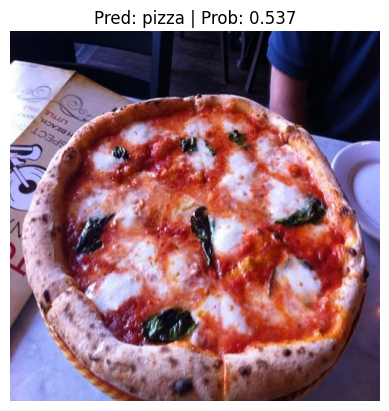

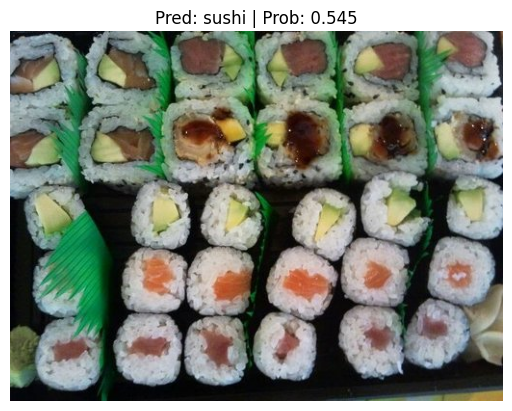

In [22]:
evaluation.pred_and_plot_local_random_images(model=model,
                        test_dir_path=test_dir,
                        class_names=class_names,
                        device=device,
                        transform=weights.transforms())

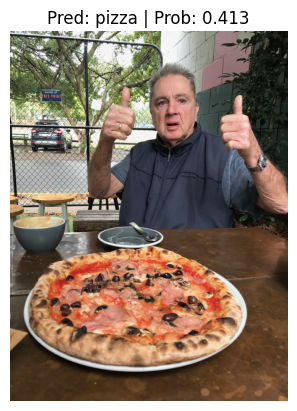

In [23]:
evaluation.pred_on_custom_image_url(model=model,
                                    class_names=class_names,
                                    device=device,
                                    transform=weights.transforms(),
                                    url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")

Saving Pizza.jpg to Pizza.jpg
Saving sushi.jpeg to sushi.jpeg


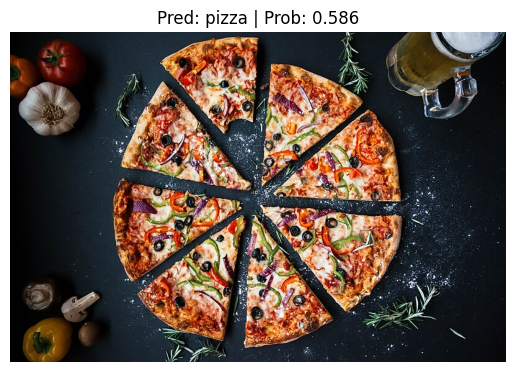

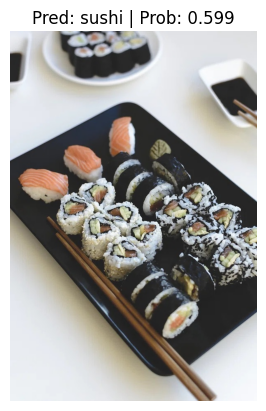

In [24]:
evaluation.pred_and_plot_colab_interface(
    model=model,
    class_names=class_names,
    device=device,
    transform=weights.transforms(),
)

Making Predictions:   0%|          | 0/3 [00:00<?, ?it/s]

{'model_name': 'EfficientNet',
 'model_loss': 0.6261007189750671,
 'model_acc': 0.8666666746139526,
 'model_precision': 0.8666666746139526,
 'model_recall': 0.8666666746139526,
 'model_fl_score': 0.8666666746139526,
 'model_confusion_matrix': array([[21,  1,  3],
        [ 0, 16,  3],
        [ 1,  2, 28]])}

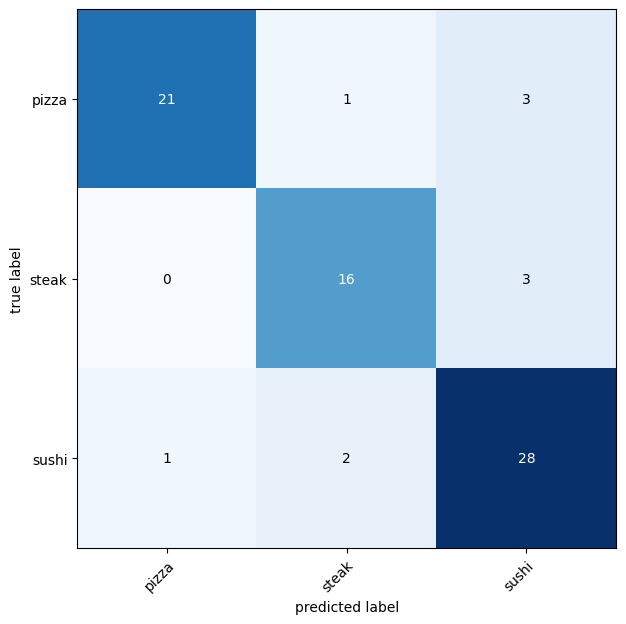

In [25]:
evaluation.evaluate_model_metrics(
    model=model,
    test_dataloader=test_dataloader,
    device=device,
    class_names=class_names,
    task="multiclass",
    loss_fn=loss_fn
)

In [26]:
report = evaluation.evaluate_classification_report(
    model=model,
    test_dataloader=test_dataloader,
    device=device,
    class_names=class_names,
    task="multiclass"
)

print(report)

Making Predictions:   0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       pizza       0.95      0.84      0.89        25
       steak       0.84      0.84      0.84        19
       sushi       0.82      0.90      0.86        31

    accuracy                           0.87        75
   macro avg       0.87      0.86      0.87        75
weighted avg       0.87      0.87      0.87        75



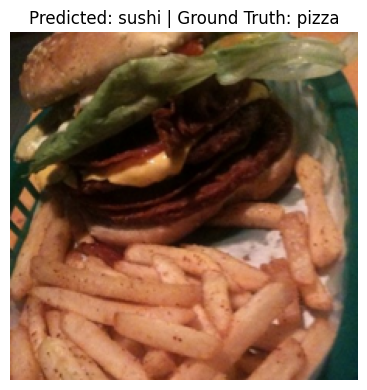

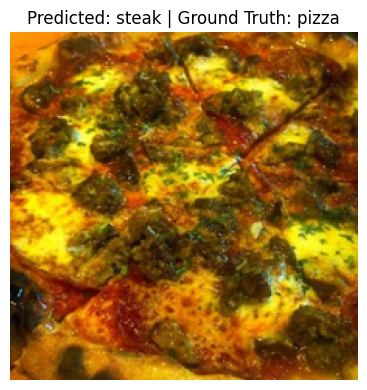

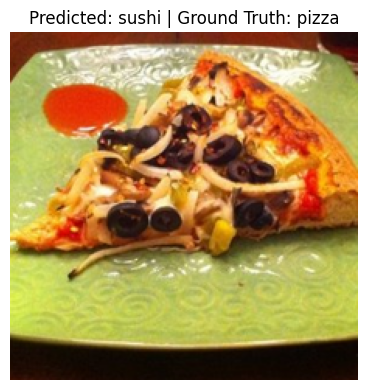

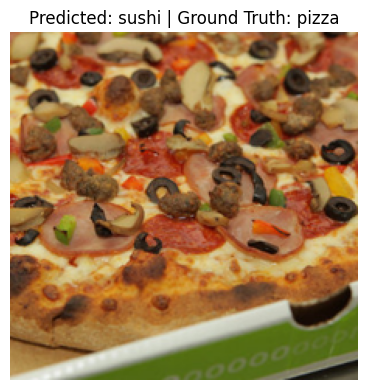

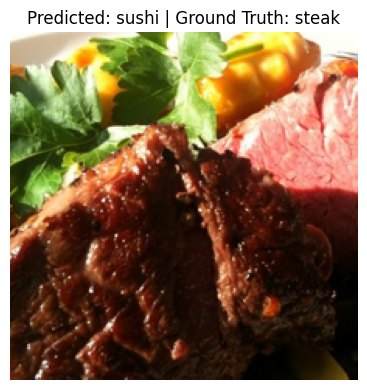

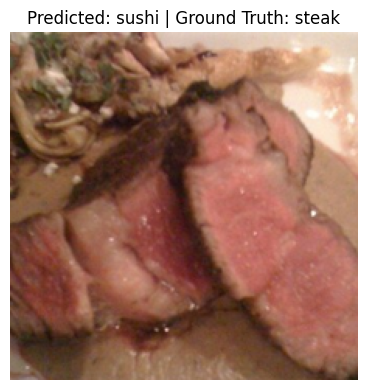

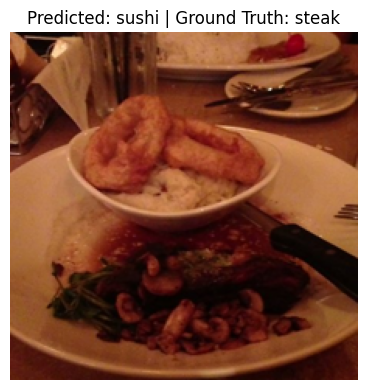

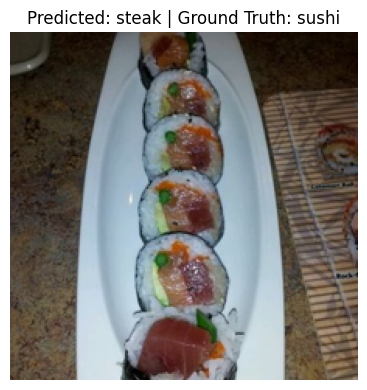

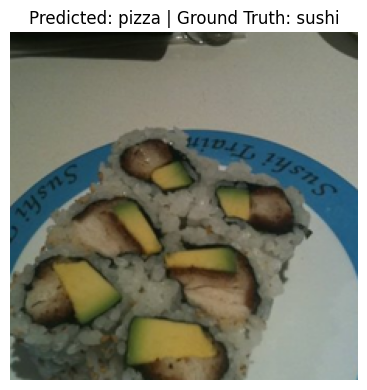

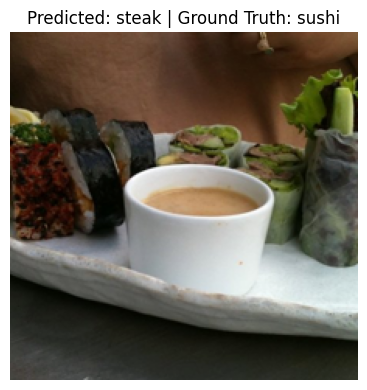

In [27]:
failed_image_gen = evaluation.failed_image_generator(
    model,
    test_dataloader,
    device,
    task="multiclass",
    threshold=0.5
)
evaluation.plot_failed_images_from_generator(
    failed_image_gen,
    class_names,
    transform=auto_transforms,
    max_images=10
)

In [28]:
print("Happy building models, end of notebook")

Happy building models, end of notebook
